# ImmoEliza Project - Part 3: Regression 

# Step 4-5: Model Application (KNN)

In [1]:
# Import cleaned & encoded data

import pandas as pd

df_formatted = pd.read_csv("./data/3_formatted_data.csv")

In [2]:
df_formatted.columns

Index(['price', 'latitude', 'longitude', 'living_area', 'garden',
       'subtype_of_property', 'building_condition', 'equipped_kitchen',
       'terrace', 'swimming_pool', 'facade_number'],
      dtype='object')

In [3]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Define Features and Target

In [4]:
# Define features and target
X = df_formatted.drop('price', axis=1)  # All columns except 'price'
y = df_formatted['price']  # Target column

### Split Data into Training and Test Set

In [5]:
# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### KNN Model Initialization (Regressor)

In [6]:
# Initialize the KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)  # You can try different values for n_neighbors

### Train the Model

In [7]:
# Train the model
knn.fit(X_train, y_train)

KNeighborsRegressor()

### Make Predictions

In [8]:
# Make predictions on both train and test data
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

### Evaluate Model

In [9]:
# Calculate MSE and R² for train data
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Calculate MSE and R² for test data
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the results
print(f"Training MSE: {mse_train}")
print(f"Training R²: {r2_train}")
print(f"Test MSE: {mse_test}")
print(f"Test R²: {r2_test}")

Training MSE: 9977837531.293325
Training R²: 0.7174473135282333
Test MSE: 16322860664.15972
Test R²: 0.562804248736462


### Optimize K (Optional)

In [10]:
# Try different values of k
k_values = range(1, 21)  # Test k from 1 to 20
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse_values.append(mean_squared_error(y_test, y_pred))

# Plot or print the best k
best_k = k_values[mse_values.index(min(mse_values))]
print(f"Best k: {best_k}")


Best k: 6


### Hyperparameter Tuning (Optional)

In [11]:
# Tune hyperparameters
knn = KNeighborsRegressor(n_neighbors=best_k, weights='distance')
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

# Calculate MSE and R² for train data
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Calculate MSE and R² for test data
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the results
print(f"Training MSE: {mse_train}")
print(f"Training R²: {r2_train}")
print(f"Test MSE: {mse_test}")
print(f"Test R²: {r2_test}")

Training MSE: 207627960.47721893
Training R²: 0.9941203855208607
Test MSE: 14466431849.939962
Test R²: 0.6125273215972245


### Use Cross-Validation to Find the best k

In [12]:
from sklearn.model_selection import cross_val_score

# Cross-validation to find the best k
cv_scores = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(-scores.mean())  # Negative because cross_val_score returns negative MSE

# Plot or print the best k based on cross-validation
best_k_cv = k_values[cv_scores.index(min(cv_scores))]
print(f"Best k (using cross-validation): {best_k_cv}")

Best k (using cross-validation): 9


In [26]:
# Tune hyperparameters
knn = KNeighborsRegressor(n_neighbors=10, weights='distance')
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

# Calculate MSE and R² for train data
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Calculate MSE and R² for test data
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the results
print(f"Training MSE: {mse_train}")
print(f"Training R²: {r2_train}")
print(f"Test MSE: {mse_test}")
print(f"Test R²: {r2_test}")

Training MSE: 206546610.847818
Training R²: 0.9941510072103644
Test MSE: 14077834562.528383
Test R²: 0.622935612552125


### Confirm K

In [27]:
# Confirm k=10 with cross-validation

from sklearn.model_selection import cross_val_score

knn_k10 = KNeighborsRegressor(n_neighbors=10, weights='distance')
scores = cross_val_score(knn_k10, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
mean_cv_mse = -scores.mean()

print("Cross-Validated MSE for k=10:", mean_cv_mse)

# Lowest MSE so 


Cross-Validated MSE for k=10: 14108867602.928387


In [28]:
# Confirm k=10 with r²

from sklearn.model_selection import cross_val_score
scores_r2 = cross_val_score(knn_k10, X_train, y_train, scoring='r2', cv=5)
mean_cv_r2 = scores_r2.mean()

print("Cross-Validated R² for k=10:", mean_cv_r2)


Cross-Validated R² for k=10: 0.6002785014051837


Training MSE: 206546610.847818
Training R²: 0.9941510072103644
Test MSE: 14077834562.528383
Test R²: 0.622935612552125

Both test values and their comparison to training results indicate overfitting, meaning the model learns noise

### Check Feature Correlations

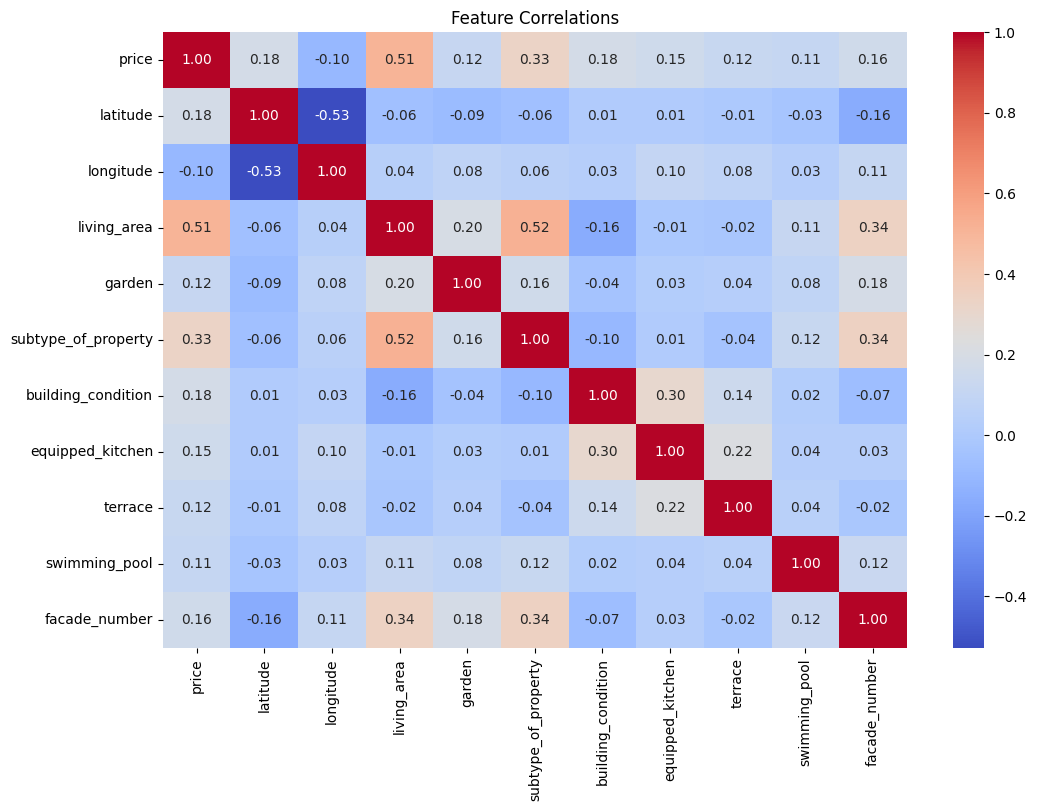

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df_formatted.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlations")
plt.show()


5-8 highest correlated features:

* living area
* subtype of property
* swimming pool
* latitude
* building condition
* facade number
* equipped kitchen
* garden

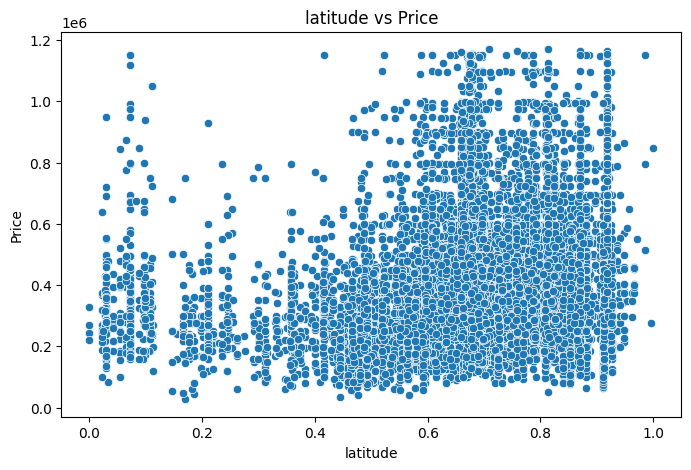

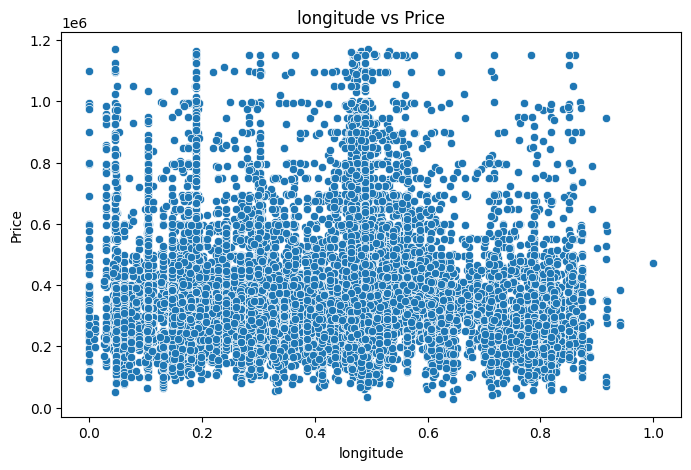

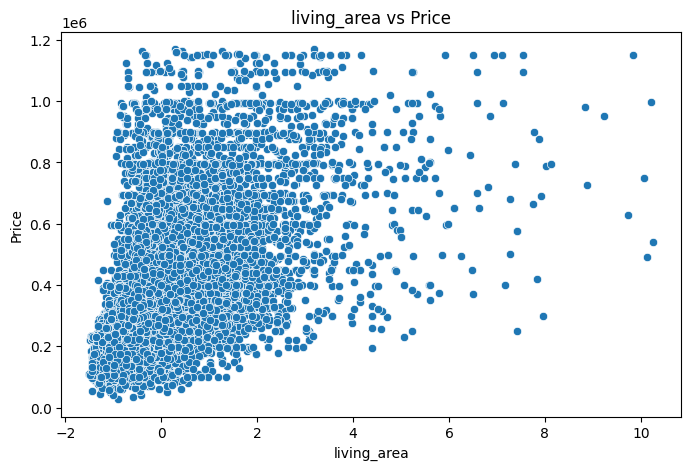

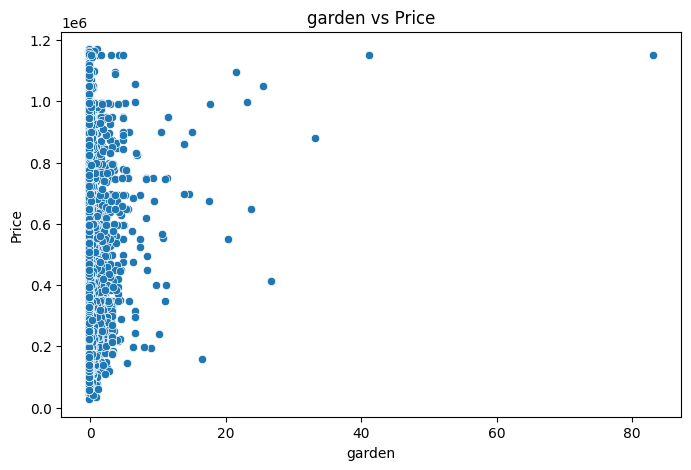

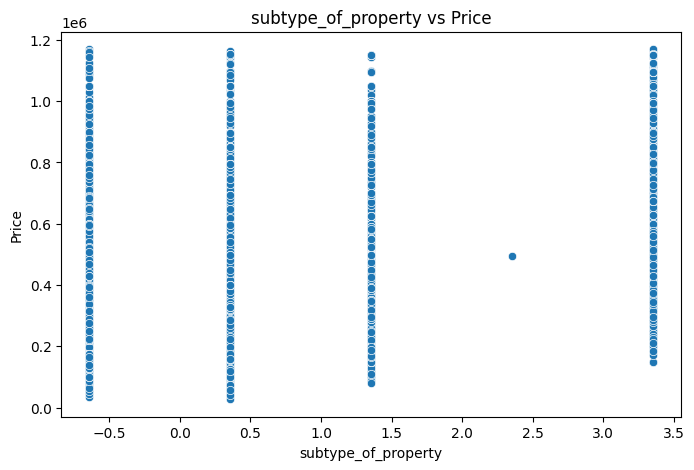

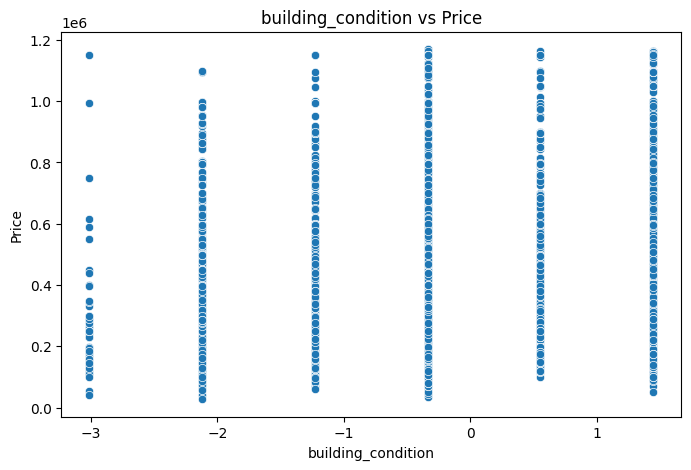

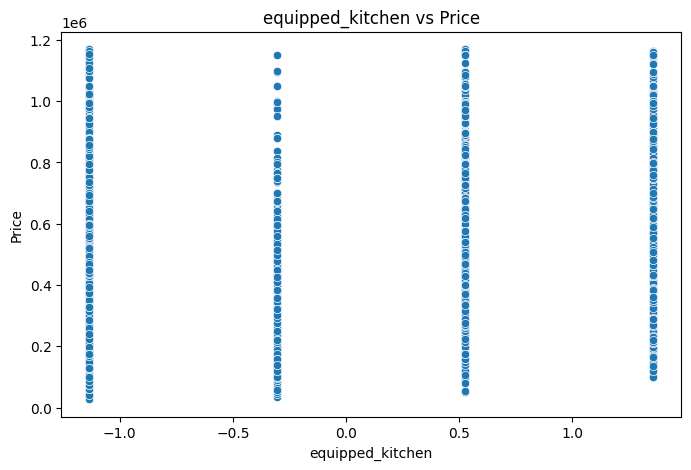

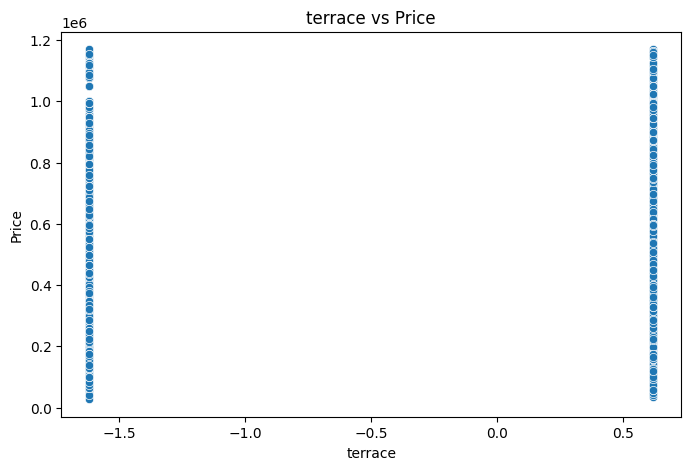

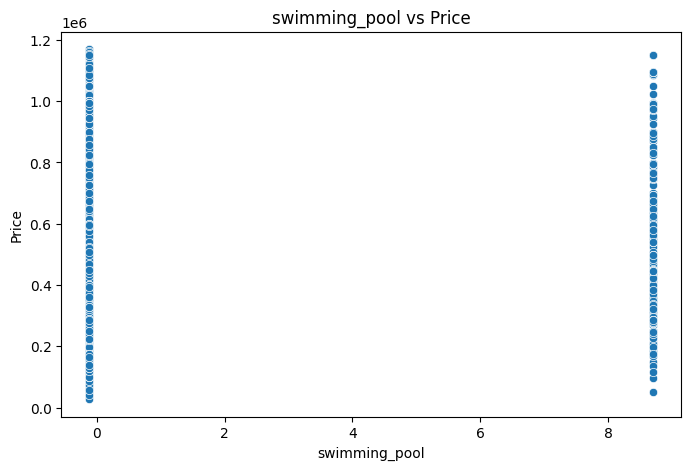

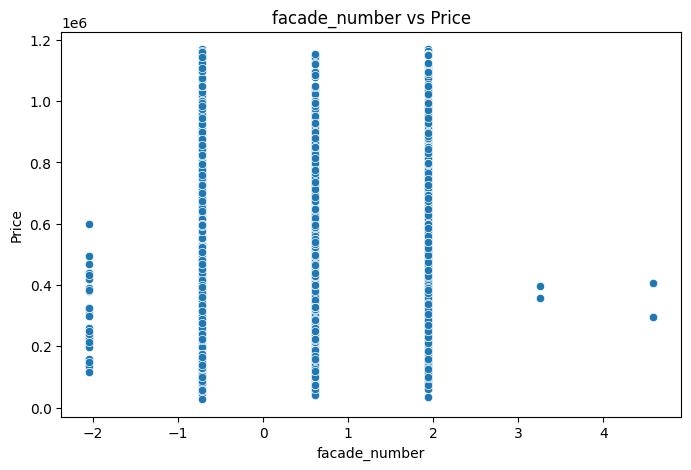

In [17]:
for column in X_train.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=X_train[column], y=y_train)
    plt.title(f"{column} vs Price")
    plt.xlabel(column)
    plt.ylabel("Price")
    plt.show()


### Residual Analysis
Residual analysis can reveal systematic errors in the predictions that indicate missing or less useful features

In [18]:
# Calculate residuals (difference between the actual and predicted values)
residuals = y_test - y_pred_test

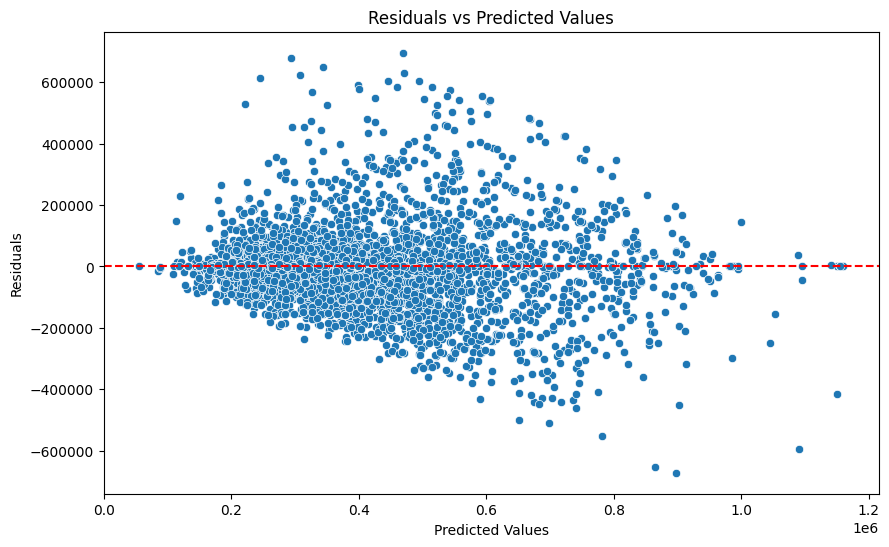

In [19]:
# Visualize residuals
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

What you see: This scatter plot shows the residuals (the differences between the actual and predicted values) on the vertical axis and the predicted values on the horizontal axis.

Interpretation:

* The horizontal red dashed line indicates where the residuals should ideally be centered (around 0). This line helps you see if there are systematic deviations in the residuals.
* A good model typically has residuals scattered randomly around this line without any obvious pattern.
* In this case, the residuals appear to increase as the predicted values rise, especially with higher predicted values. This suggests that the model has heteroscedasticity (variance of residuals is not constant), meaning it performs worse for higher predicted values.
* Ideally, you want this plot to show no clear pattern or structure. If there’s a trend (like here), it indicates that the model might not be capturing something in the data that it should, especially for higher values.

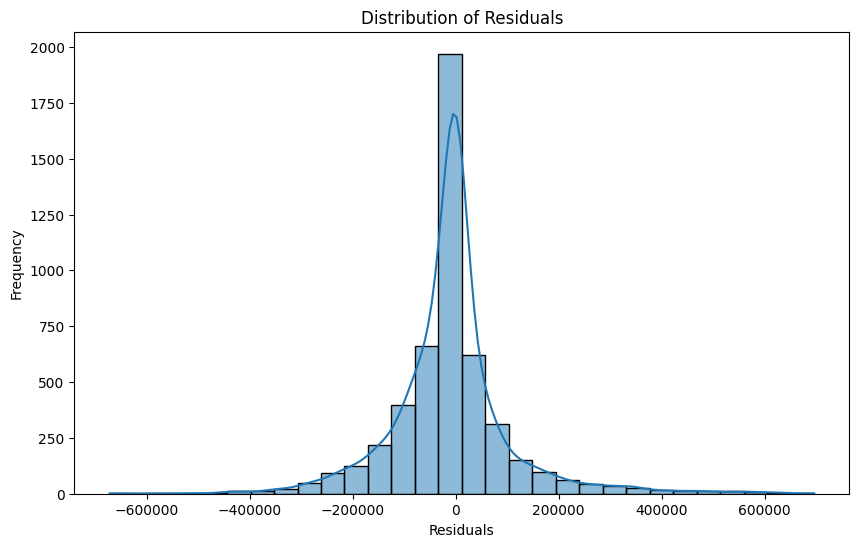

In [20]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

What you see: This is a histogram with a kernel density estimate (KDE) curve, showing the distribution of residuals.

Interpretation:

* The spike around 0 suggests that most residuals are close to 0, indicating that the model’s predictions are generally quite accurate for most instances.
* However, you can see that the residuals have a heavy skew, with a long tail on the right side. This points to the fact that there are some predictions that are off by a large amount, and the model is not doing well on those instances.
* Ideally, the residuals should follow a normal distribution, and this plot looks non-normal, which might indicate a bias in the model or the presence of outliers that the model cannot handle well.

What to Do Next?

* Check for outliers: The skewness in the distribution suggests that some points may be far off, which could influence the model’s accuracy.
* Consider transforming the data: If you suspect non-linearity or heteroscedasticity, you could try transforming the target variable (e.g., applying a log transformation).
* Tune your model: You might need to adjust your KNN model’s parameters, such as the number of neighbors.
* Model evaluation: Consider using other residual diagnostics, like the Q-Q plot, to check for normality of residuals or running cross-validation to confirm if this trend holds across different subsets of the data.

### Inversing log transformation of target

In [21]:
import numpy as np

# Inverse predicted values
y_pred_original = np.expm1(y_pred_test)

# Inverse original log tranformed values
y_test_original = np.expm1(y_test)

C:\Users\mstoe\AppData\Local\Temp\ipykernel_29628\2232782109.py:4: RuntimeWarning: overflow encountered in expm1
  y_pred_original = np.expm1(y_pred_test)
c:\Users\mstoe\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [22]:
# Calculate mse and r²

mse_original = mean_squared_error(y_test_original, y_pred_original)
r2_original = r2_score(y_test_original, y_pred_original)

print(f'MSE (Original scale): {mse_original}')
print(f'R² (Original scale): {r2_original}')


ValueError: Input contains infinity or a value too large for dtype('float64').